In [ ]:
# Imports

import pandas as pd
import openai
import os
from scipy.spatial import distance

from funcoes.embeddings import (
    embedding_from_string,
    pegar_embedding_cache,
    adicionar_embeddings
)

In [ ]:
# Configurations

openai.api_key = os.environ.get("OPEN_API_KEY")
model = os.environ.get("EMBEDDINGS_MODEL")
embedding_cache_path = os.environ.get("EMBEDDINGS_CACHE_PATH")
embedding_cache = pegar_embedding_cache(embedding_cache_path)

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', 1000)

In [ ]:
# Getting data

columns_to_read = ['name','description','employees','total_funding','city','subcountry','lat','lng']
dados = pd.read_excel('base_dados_3.xls', usecols=columns_to_read)

In [ ]:
# Getting a sampple

dados_reduzidos = dados[0:16150]

In [ ]:
# Getting embeddings

adicionar_embeddings(dados_reduzidos, 'description', model, embedding_cache, embedding_cache_path)

In [ ]:
# Creating a string of interesting and it's embeddings

string = 'Solutions on waste and water - Improve water quality and water efficiency use - Water contamination - Water for human consumption - Water resources'
vetor_comparativo = embedding_from_string(string, model, embedding_cache, embedding_cache_path)

In [ ]:
# Calculating the distances

distancias = [distance.cosine(vetor_comparativo, emb) for emb in dados_reduzidos['Embeddings']]
dados_reduzidos['distancias'] = distancias

In [ ]:
# Verifying the presence of the term 'water' 

dados_reduzidos['contem_termo'] = dados_reduzidos['description'].str.contains(' water ', case=False, na=False).astype(int)

In [ ]:
# Sorting the values

dados_reduzidos = dados_reduzidos.sort_values(by=['contem_termo','distancias'],ascending=[False, True])

In [ ]:
# Saving temporary results

dados_reduzidos.to_csv('dados_reduzidos.csv')

In [ ]:
# Checking temporary results

dados_reduzidos[['description','contem_termo']].iloc[0:100]

In [ ]:
# Creating the results database

dados_interesse = dados_reduzidos.iloc[0:89]

In [ ]:
# Saving the results database

dados_interesse.to_csv('dados_interesse.csv')

<Axes: >

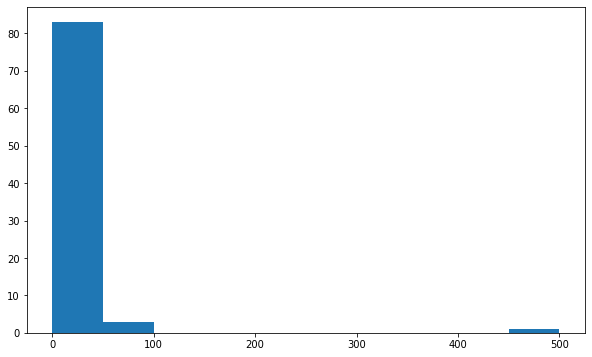

In [79]:
# Creating histogram

dados_interesse['employees'].hist(bins=10, figsize=(10, 6), grid=False)

<Axes: >

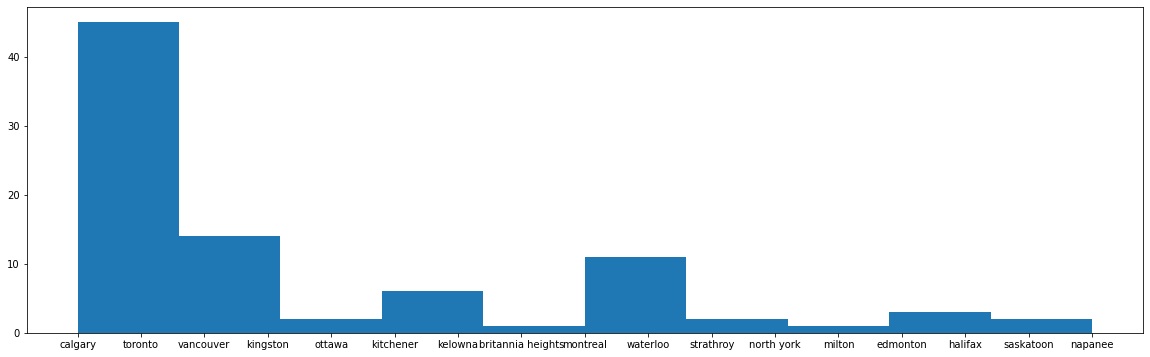

In [78]:
# Creating histogram

dados_interesse['city'].hist(bins=10, figsize=(20, 6), grid=False)